In [96]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [97]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib as mpl
mpl.rc('font',family='Arial')

In [98]:
from matplotlib.collections import PolyCollection
from matplotlib.legend_handler import HandlerTuple
from matplotlib.colors import to_rgb

In [99]:
c57_df=pd.read_excel('.\\data\\DSC-ContestedvNotContested.xlsx',sheet_name="C57")
cd1_df=pd.read_excel('.\\data\\DSC-ContestedvNotContested.xlsx',sheet_name="CD1")


In [100]:
c57_df.head()

,PILOT,Date,Cage,Box,Match,updated ID,URM ELO 1,URM RANK 1,URM ELO 2,URM RANK 2,...,Trial 17,Trial 18,Trial 19,Trial 20,Unnamed: 34,contested,not contested,ties,%contested,% not contested
0,1,2023-05-19,1,1,1.1 v 2.2,1.1 v 1.2,1010.3,2,1000.8,3,...,0.0,1.0,1.0,0,NaN,9,10,0,76.259798,23.740202
1,1,2023-05-19,1,2,2.3 v 1.4,1.3 v 1.4,972.0,4,1016.9,1,...,0.0,0.0,0.0,1,NaN,7,12,0,NaN,NaN
2,1,2023-05-19,1,3,1.1 v 2.3,1.1 v 1.3,1010.3,2,972.0,4,...,1.0,1.0,0.0,NO TRIAL,NaN,15,4,2,NaN,NaN
3,1,2023-05-19,1,4,2.2 v 1.4,NaN,1000.8,3,1016.9,1,...,1.0,0.0,0.0,0,NaN,11,8,0,NaN,NaN
4,1,2023-05-19,1,2,2.2 v 2.3,NaN,1000.8,3,972.0,4,...,1.0,1.0,1.0,1,NaN,15,4,1,NaN,NaN


In [101]:
c57_df.drop(c57_df.columns[c57_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cd1_df.drop(cd1_df.columns[cd1_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [102]:
c57_df.head()

,PILOT,Date,Cage,Box,Match,updated ID,URM ELO 1,URM RANK 1,URM ELO 2,URM RANK 2,...,Trial 16,Trial 17,Trial 18,Trial 19,Trial 20,contested,not contested,ties,%contested,% not contested
0,1,2023-05-19,1,1,1.1 v 2.2,1.1 v 1.2,1010.3,2,1000.8,3,...,0.0,0.0,1.0,1.0,0,9,10,0,76.259798,23.740202
1,1,2023-05-19,1,2,2.3 v 1.4,1.3 v 1.4,972.0,4,1016.9,1,...,0.0,0.0,0.0,0.0,1,7,12,0,NaN,NaN
2,1,2023-05-19,1,3,1.1 v 2.3,1.1 v 1.3,1010.3,2,972.0,4,...,0.0,1.0,1.0,0.0,NO TRIAL,15,4,2,NaN,NaN
3,1,2023-05-19,1,4,2.2 v 1.4,NaN,1000.8,3,1016.9,1,...,1.0,1.0,0.0,0.0,0,11,8,0,NaN,NaN
4,1,2023-05-19,1,2,2.2 v 2.3,NaN,1000.8,3,972.0,4,...,1.0,1.0,1.0,1.0,1,15,4,1,NaN,NaN


In [103]:
cd1_df.head()

,PILOT,Date,Cage,Box,Match,URM ELO 1,URM RANK 1,URM ELO 2,URM RANK 2,HCO ELO1,...,Trial 16,Trial 17,Trial 18,Trial 19,Trial 20,ties,contested,not contested,%contested,% not contested
0,1,2023-05-19,3,1,4.1 (1) v 3.2 (2),1010.6,1,999.4,3,1185.0,...,0,0,1,1,1,0,8,11,71.929825,28.070175
1,1,2023-05-19,3,2,4.2 (3) v 3.3 (4),989.2,4,1000.8,2,980.7,...,0,0,0,1,0,0,8,11,NaN,NaN
2,1,2023-05-19,3,3,4.1 (1) v 4.2 (3),1010.6,1,989.2,4,1185.0,...,0,0,1,0,NO TRIAL,0,10,9,NaN,NaN
3,1,2023-05-19,3,4,3.2 (2) v 3.3 (4),999.4,3,1000.8,2,889.6,...,1,1,1,0,NO TRIAL,1,9,10,NaN,NaN
4,1,2023-05-19,3,1,4.1 (1) v 3.3 (4),1010.6,1,1000.8,2,1185.0,...,0,1,1,1,NO TRIAL,1,13,6,NaN,NaN


In [104]:

c57_uncontested= np.sum(c57_df['not contested'])
c57_tied = np.sum(c57_df['ties'])
c57_contested = np.sum(c57_df['contested']) - c57_tied
c57_total = c57_contested + c57_uncontested + c57_tied

In [105]:

cd1_uncontested= np.sum(cd1_df['not contested'])
cd1_tied = np.sum(cd1_df['ties'])
cd1_contested = np.sum(cd1_df['contested']) - cd1_tied
cd1_total = cd1_contested + cd1_uncontested + cd1_tied

In [106]:
c57_perc_con = 100*c57_contested/c57_total
c57_perc_un = 100*c57_uncontested/c57_total
c57_perc_t = 100*c57_tied/c57_total

cd1_perc_con = 100*cd1_contested/cd1_total
cd1_perc_un = 100*cd1_uncontested/cd1_total
cd1_perc_t = 100*cd1_tied/cd1_total

In [107]:
x= ["CD1", "C57"]
un = np.array([cd1_perc_un, c57_perc_un])
con = np.array([cd1_perc_con, c57_perc_con])
t = np.array([cd1_perc_t, c57_perc_t])
t

array([6.79824561, 8.17469205])

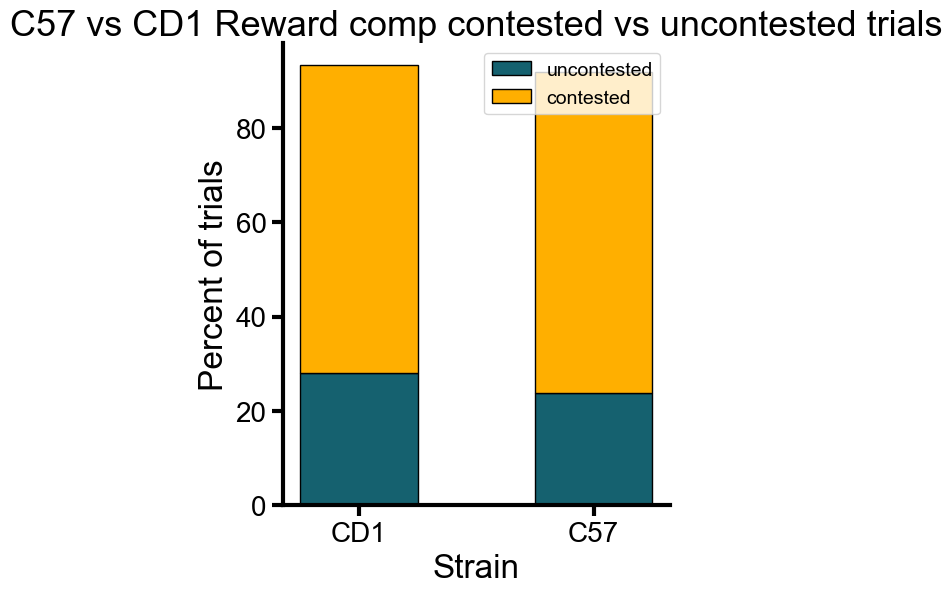

In [108]:
fig, ax = plt.subplots(figsize=(5,6))
plt.bar(x, un, label= "uncontested", color = '#15616F', edgecolor = 'black', width=0.5)
plt.bar(x, con, bottom = un, label = "contested", color = '#FFAF00', edgecolor = 'black', width = 0.5)

plt.title("C57 vs CD1 Reward comp contested vs uncontested trials", family="Arial", fontsize=26)
plt.xlabel("Strain", family="Arial", fontsize=24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("Percent of trials", family="Arial", fontsize=24)
plt.legend( prop={'size': 14, 'family': "Arial"})
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.show()

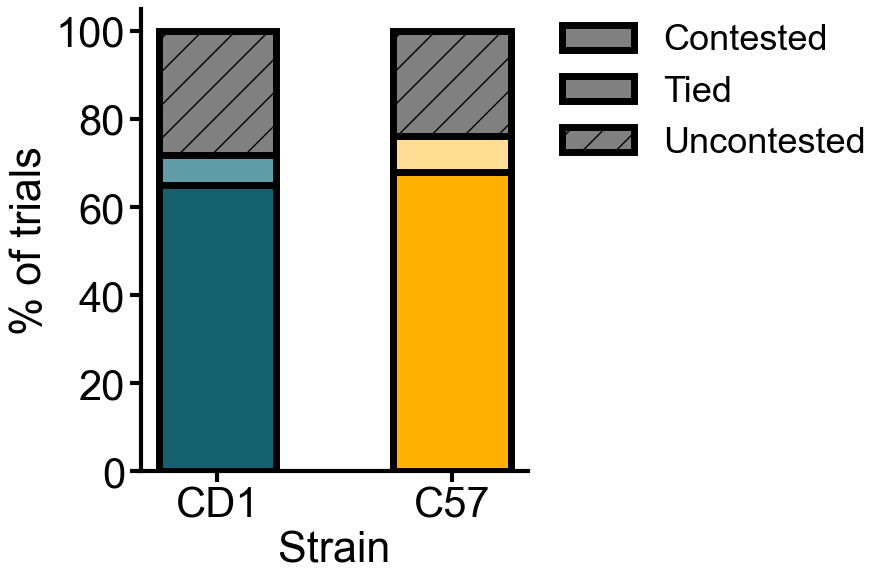

In [119]:
fig, ax = plt.subplots(figsize=(5,6))

# Adjusted width and spacing
bar_width = 0.125

bars2 = plt.bar(x, con, label = "Contested", color = 'gray', edgecolor = 'black', width = 0.5, linewidth = 5,  alpha = 1)
bars3 = plt.bar(x,t, bottom = con, label="Tied",edgecolor = 'black', color = 'gray',linewidth = 5, width = 0.5, alpha = 1)
bars1 = plt.bar(x, un,bottom = con + t,  label= "Uncontested",color = 'gray', edgecolor = 'black', hatch = '/',width=0.5, linewidth = 5, alpha = 1)


#plt.title("C57 vs CD1 Reward comp contested vs uncontested trials", family="Arial", fontsize=26)
plt.xlabel("Strain", family="Arial", fontsize=31)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel("% of trials", family="Arial", fontsize=31)
plt.legend( prop={'size': 26, 'family': "Arial"}, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, borderaxespad=0)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

bars3[0].set_color('#619DA7')
bars2[0].set_color('#15616F')


bars3[1].set_color('#FFDD92')
bars2[1].set_color('#FFAF00')
for bar in bars3:
    bar.set_edgecolor('black')
for bar in bars1:
    bar.set_edgecolor('black')
for bar in bars2:
    bar.set_edgecolor('black')


plt.show()
fig.savefig("bars.svg", format='svg', bbox_inches='tight')

In [ ]:
c57_df2 = c57_df[c57_df["HCO ELO1"].notna()]
cd1_df2 = cd1_df[cd1_df["HCO ELO1"].notna()]

In [ ]:
c57_df2["urm_rank_diff"]=c57_df2.apply(lambda x: np.absolute(x["URM RANK 1"]-x["URM RANK 2"]), axis = 1)
c57_df2["urm_elo_diff"]=c57_df2.apply(lambda x: np.absolute(x["URM ELO 1"]-x["URM ELO 2"]), axis = 1)

c57_df2["hco_rank_diff"]=c57_df2.apply(lambda x: np.absolute(x["HCO RANK1"]-x["HCO RANK2"]), axis = 1)
c57_df2["hco_elo_diff"]=c57_df2.apply(lambda x: np.absolute(x["HCO ELO1"]-x["HCO ELO2"]), axis = 1)

C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2737054272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c57_df2["urm_rank_diff"]=c57_df2.apply(lambda x: np.absolute(x["URM RANK 1"]-x["URM RANK 2"]), axis = 1)
C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2737054272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c57_df2["urm_elo_diff"]=c57_df2.apply(lambda x: np.absolute(x["URM ELO 1"]-x["URM ELO 2"]), axis = 1)
C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2737054272.py:4: SettingWithC

In [ ]:
c57_df2.head()

,PILOT,Date,Cage,Box,Match,updated ID,URM ELO 1,URM RANK 1,URM ELO 2,URM RANK 2,...,Trial 20,contested,not contested,ties,%contested,% not contested,urm_rank_diff,urm_elo_diff,hco_rank_diff,hco_elo_diff
12,2,2023-07-28,1,1,1v2,NaN,991.9,2,1045.9,1,...,NaN,15,4,1,NaN,NaN,1,54.0,3.0,283.6
13,2,2023-07-28,1,2,3v4,NaN,972.0,4,990.2,3,...,NaN,14,5,0,NaN,NaN,1,18.2,1.0,53.8
14,2,2023-07-28,1,3,2v3,NaN,1045.9,1,972.0,4,...,NaN,13,6,4,NaN,NaN,3,73.9,2.0,267.3
15,2,2023-07-28,1,4,1v4,NaN,991.9,2,990.2,3,...,NaN,16,3,0,NaN,NaN,1,1.7,2.0,70.1
16,2,2023-07-28,1,1,2v4,NaN,1045.9,1,990.2,3,...,NaN,11,8,5,NaN,NaN,2,55.7,1.0,213.5


In [ ]:
cd1_df2["urm_rank_diff"]=cd1_df2.apply(lambda x: np.absolute(x["URM RANK 1"]-x["URM RANK 2"]), axis = 1)
cd1_df2["urm_elo_diff"]=cd1_df2.apply(lambda x: np.absolute(x["URM ELO 1"]-x["URM ELO 2"]), axis = 1)

cd1_df2["hco_rank_diff"]=cd1_df2.apply(lambda x: np.absolute(x["HCO RANK1"]-x["HCO RANK2"]), axis = 1)
cd1_df2["hco_elo_diff"]=cd1_df2.apply(lambda x: np.absolute(x["HCO ELO1"]-x["HCO ELO2"]), axis = 1)

C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2324392857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd1_df2["urm_rank_diff"]=cd1_df2.apply(lambda x: np.absolute(x["URM RANK 1"]-x["URM RANK 2"]), axis = 1)
C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2324392857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd1_df2["urm_elo_diff"]=cd1_df2.apply(lambda x: np.absolute(x["URM ELO 1"]-x["URM ELO 2"]), axis = 1)
C:\Users\aidan\AppData\Local\Temp\ipykernel_44252\2324392857.py:4: SettingWithC

In [ ]:
bins1 = [1,2,3]
c57_un_urm_rank = []
for i in bins1:
    int = c57_df2[c57_df2["urm_rank_diff"] == i]
    sum = np.sum(int["not contested"])
    avg = sum/len(int["not contested"])
    c57_un_urm_rank.append(avg)

In [ ]:
bins2 = [1,2,3]
c57_un_hco_rank = []
for i in bins1:
    int = c57_df2[c57_df2["hco_rank_diff"] == i]
    sum = np.sum(int["not contested"])
    avg = sum/len(int["not contested"])
    c57_un_hco_rank.append(avg)

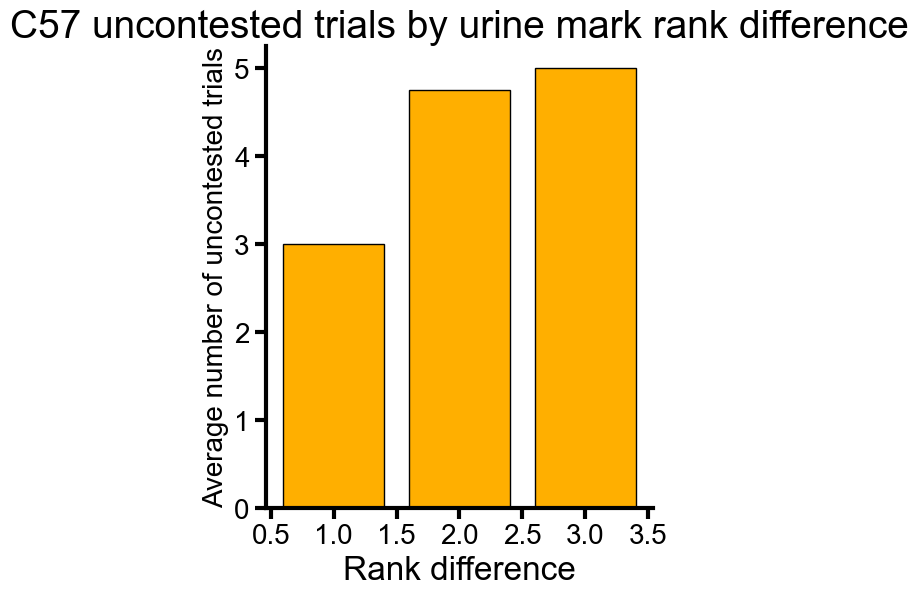

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

plt.bar(bins1, c57_un_urm_rank, label= "uncontested", color = "#FFAF00", edgecolor = 'black')


plt.title("C57 uncontested trials by urine mark rank difference", family="Arial", fontsize=28)
plt.xlabel("Rank difference", family="Arial", fontsize=24)
plt.ylabel("Average number of uncontested trials", family="Arial", fontsize=20)
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


plt.show()

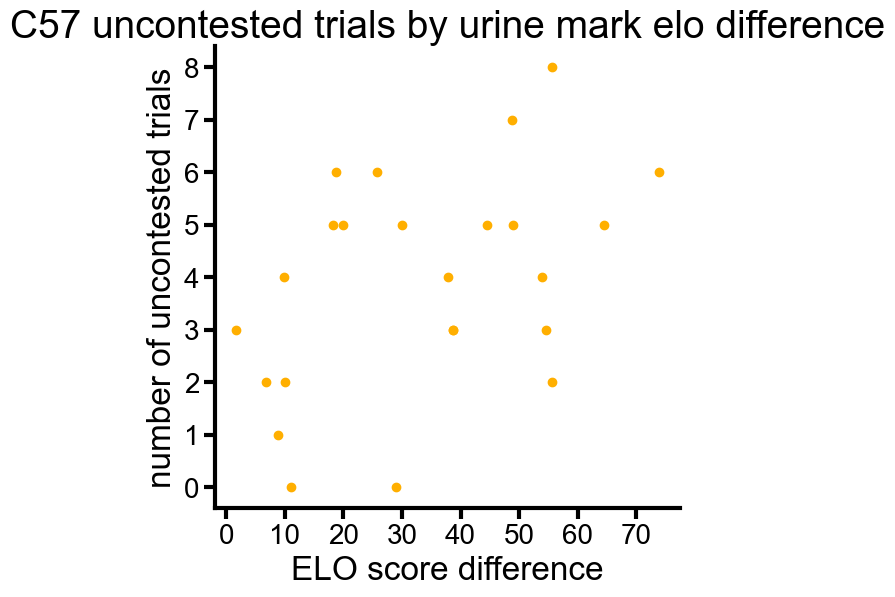

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(c57_df2["urm_elo_diff"], c57_df2["not contested"], label= "uncontested", color = "#FFAF00")

plt.title("C57 uncontested trials by urine mark elo difference", family="Arial", fontsize=28)
plt.xlabel("ELO score difference", family="Arial", fontsize=24)
plt.ylabel("number of uncontested trials", family="Arial", fontsize=24)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


plt.show()

In [ ]:
bins0 = [1,2,3]
cd1_un_urm_rank = []
for j in bins0:
    temp = cd1_df2[cd1_df2["urm_rank_diff"] == j]
    t = np.array(temp["not contested"])
    sum = np.sum(t)
    avg = sum/len(t)
    cd1_un_urm_rank.append(avg)

In [ ]:
bins3 = [1,2,3]
cd1_un_hco_rank = []
for j in bins0:
    temp = cd1_df2[cd1_df2["hco_rank_diff"] == j]
    t = np.array(temp["not contested"])
    sum = np.sum(t)
    avg = sum/len(t)
    cd1_un_hco_rank.append(avg)

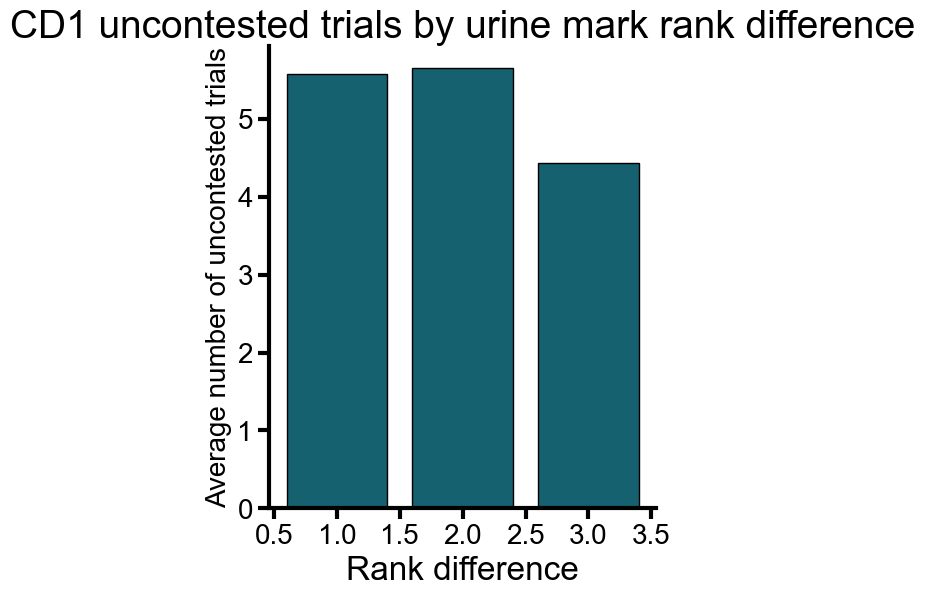

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

plt.bar(bins1, cd1_un_urm_rank, label= "uncontested", color ='#15616F', edgecolor='black')

plt.title("CD1 uncontested trials by urine mark rank difference", family="Arial", fontsize=28)
plt.xlabel("Rank difference", family="Arial", fontsize=24)
plt.ylabel("Average number of uncontested trials", family="Arial", fontsize=20)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)



plt.show()

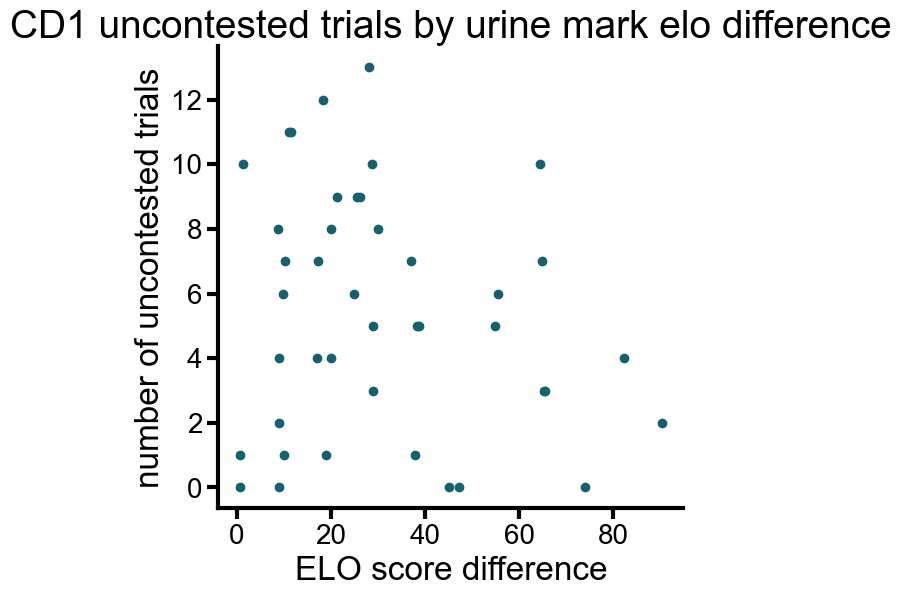

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(cd1_df2["urm_elo_diff"], cd1_df2["not contested"], label= "uncontested", color = '#15616F')

plt.title("CD1 uncontested trials by urine mark elo difference", family="Arial", fontsize=28)
plt.xlabel("ELO score difference", family="Arial", fontsize=24)
plt.ylabel("number of uncontested trials", family="Arial", fontsize=24)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


plt.show()

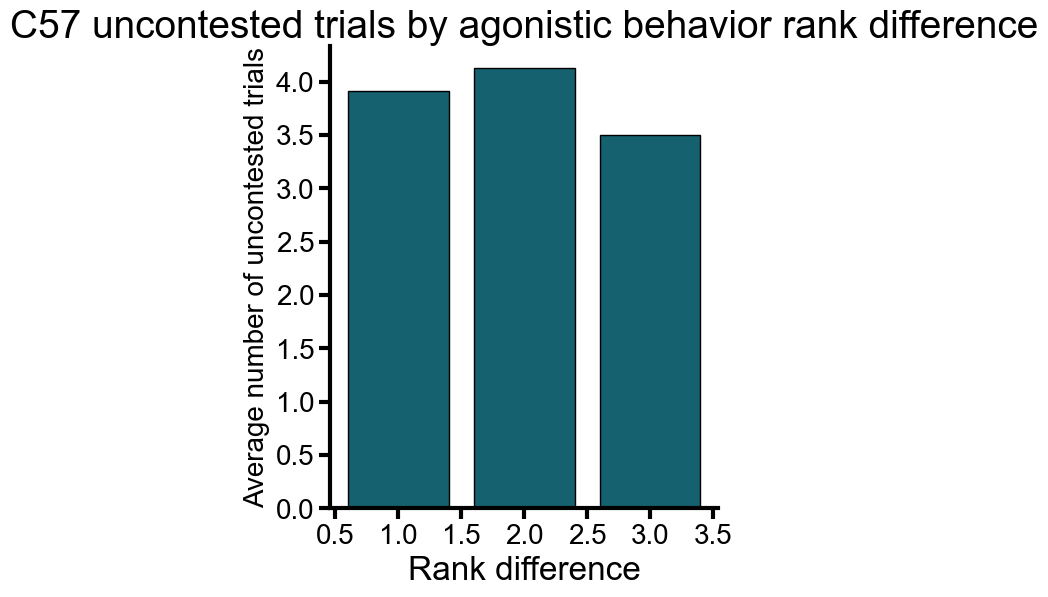

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

plt.bar(bins2, c57_un_hco_rank, label= "uncontested", color = '#15616F', edgecolor = 'black')

plt.title("C57 uncontested trials by agonistic behavior rank difference", family="Arial", fontsize=28)
plt.xlabel("Rank difference", family="Arial", fontsize=24)
plt.ylabel("Average number of uncontested trials", family="Arial", fontsize=20)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

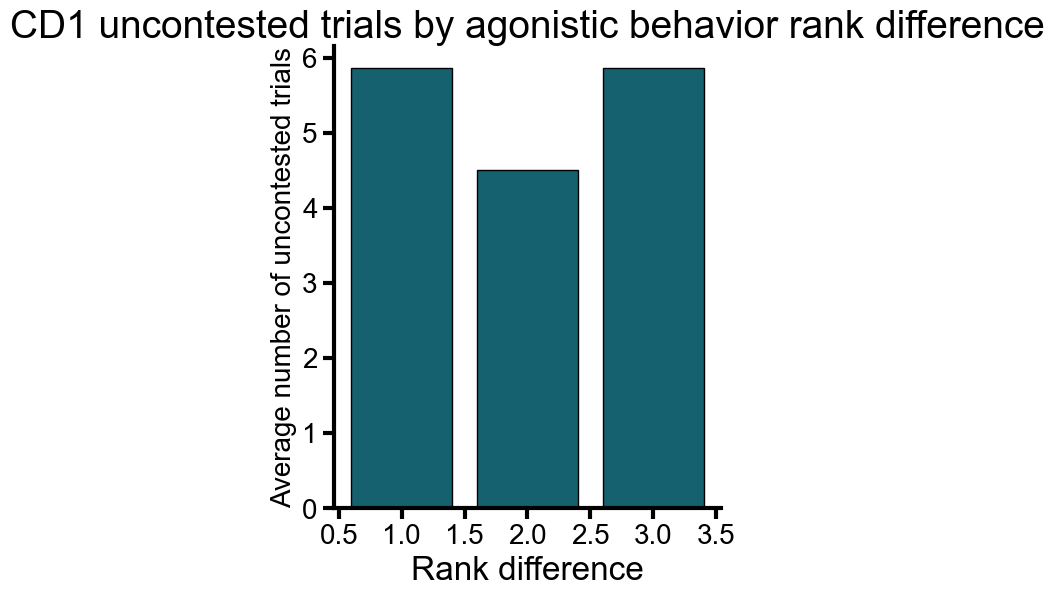

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

plt.bar(bins3, cd1_un_hco_rank, label= "uncontested", color = '#15616F', edgecolor = 'black')

plt.title("CD1 uncontested trials by agonistic behavior rank difference", family="Arial", fontsize=28)
plt.xlabel("Rank difference", family="Arial", fontsize=24)
plt.ylabel("Average number of uncontested trials", family="Arial", fontsize=20)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

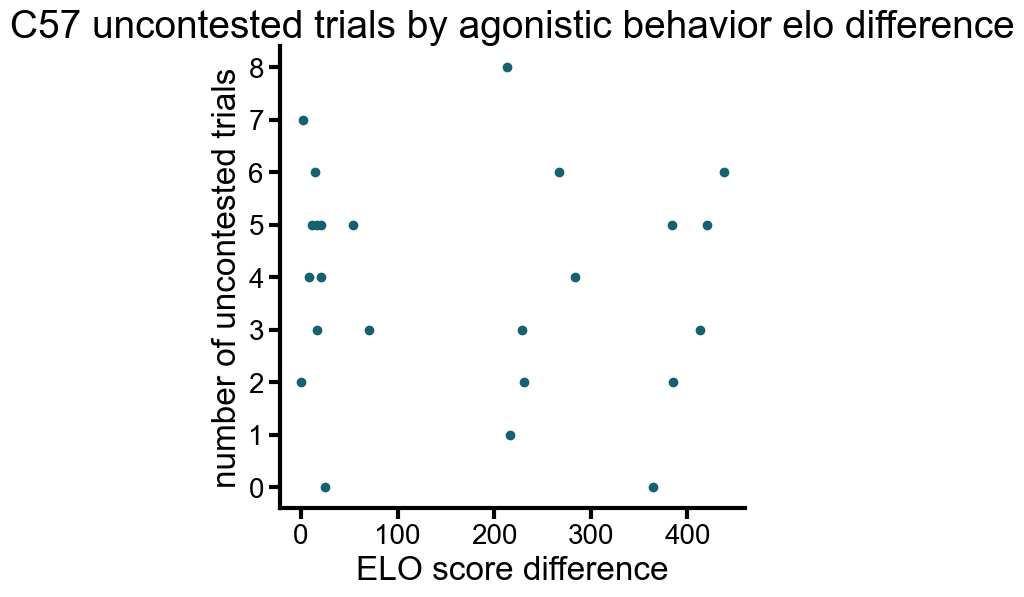

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(c57_df2["hco_elo_diff"], c57_df2["not contested"], label= "uncontested", color = '#15616F')

plt.title("C57 uncontested trials by agonistic behavior elo difference", family="Arial", fontsize=28)
plt.xlabel("ELO score difference", family="Arial", fontsize=24)
plt.ylabel("number of uncontested trials", family="Arial", fontsize=24)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

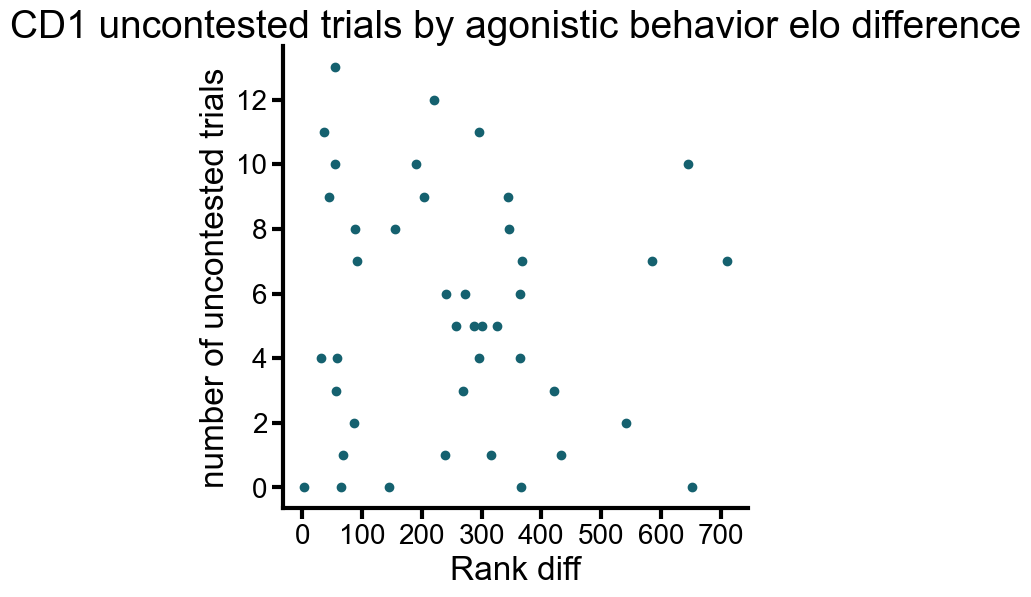

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

plt.scatter(cd1_df2["hco_elo_diff"], cd1_df2["not contested"], label= "uncontested", color = '#15616F')

plt.title("CD1 uncontested trials by agonistic behavior elo difference", family="Arial", fontsize=28)
plt.xlabel("Rank diff", family="Arial", fontsize=24)
plt.ylabel("number of uncontested trials", family="Arial", fontsize=24)

for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()